# Import bibliotek

In [23]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, Lasso
from sklearn.metrics import mean_squared_error, r2_score



# Wczytanie pliku csv i podgląd

In [8]:
df = pd.read_csv("tmdb_5000_movies.csv")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
print(df.columns.tolist())

['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [11]:
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

homepage        3091
tagline          844
overview           3
runtime            2
release_date       1
dtype: int64


In [12]:
df[["runtime", "popularity", "vote_count", "vote_average"]].describe().T

,count,mean,std,min,25%,50%,75%,max
runtime,4801.0,106.875859,22.611935,0.0,94.00000,103.000000,118.000000,338.000000
popularity,4803.0,21.492301,31.816650,0.0,4.66807,12.921594,28.313505,875.581305
vote_count,4803.0,690.217989,1234.585891,0.0,54.00000,235.000000,737.000000,13752.000000
vote_average,4803.0,6.092172,1.194612,0.0,5.60000,6.200000,6.800000,10.000000


## Rozkład średniej oceny

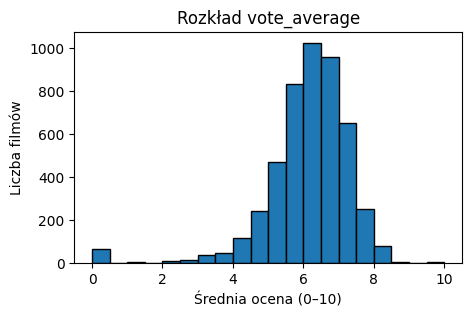

In [13]:
plt.figure(figsize=(5,3))
plt.hist(df["vote_average"], bins=20, edgecolor="k")
plt.xlabel("Średnia ocena (0–10)")
plt.ylabel("Liczba filmów")
plt.title("Rozkład vote_average")
plt.show()

## Rozkład czasu trwania

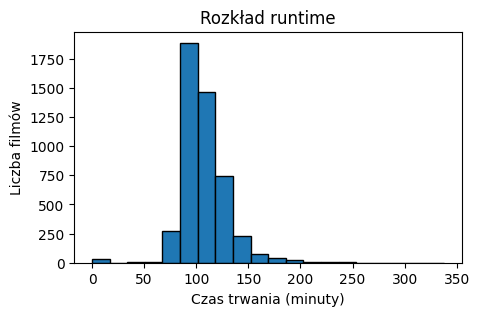

In [14]:
plt.figure(figsize=(5,3))
plt.hist(df["runtime"].dropna(), bins=20, edgecolor="k")
plt.xlabel("Czas trwania (minuty)")
plt.ylabel("Liczba filmów")
plt.title("Rozkład runtime")
plt.show()

## Rozkład liczby głosów

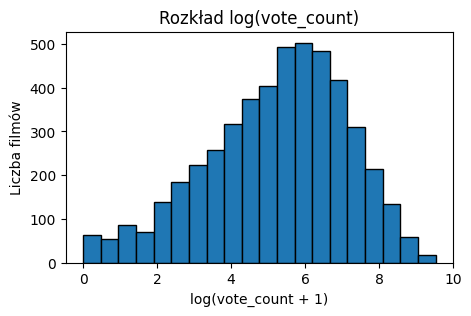

In [15]:
plt.figure(figsize=(5,3))
plt.hist(np.log1p(df["vote_count"]), bins=20, edgecolor="k")
plt.xlabel("log(vote_count + 1)")
plt.ylabel("Liczba filmów")
plt.title("Rozkład log(vote_count)")
plt.show()

In [16]:
corr = df[["runtime", "popularity", "vote_count", "vote_average"]].corr()
print(corr)

               runtime  popularity  vote_count  vote_average
runtime       1.000000    0.225502    0.271944      0.375046
popularity    0.225502    1.000000    0.778130      0.273952
vote_count    0.271944    0.778130    1.000000      0.312997
vote_average  0.375046    0.273952    0.312997      1.000000


## Odfiltrowanie braków i ekstrakcja release_year

In [19]:
df2 = df.copy()

# 1. Usunięcie wierszy bez release_date lub runtime == 0
df2 = df2.dropna(subset=["release_date"])      
df2 = df2[df2["runtime"] > 0]                  

# 2. Zamiana release_date na datetime i wyciągnięcie roku
df2["release_date"] = pd.to_datetime(df2["release_date"], errors="coerce")
df2 = df2.dropna(subset=["release_date"])     
df2["release_year"] = df2["release_date"].dt.year

df2[["release_date","release_year","runtime"]].head()

,release_date,release_year,runtime
0,2009-12-10,2009,162.0
1,2007-05-19,2007,169.0
2,2015-10-26,2015,148.0
3,2012-07-16,2012,165.0
4,2012-03-07,2012,132.0


## One-hot encoding gatunków


In [20]:
# 1. Zamiana JSON-like string na prawdziwą listę nazw
def parse_genres(s):
    lst = ast.literal_eval(s)
    return [d["name"] for d in lst]

df2["genres_list"] = df2["genres"].apply(parse_genres)

# 2. One-hot z MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_dummies = pd.DataFrame(
    mlb.fit_transform(df2["genres_list"]),
    columns=mlb.classes_,
    index=df2.index
)

# 3. Doklejenie do głównego DF
df3 = pd.concat([df2, genres_dummies], axis=1)


print(genres_dummies.columns.tolist())
df3.head(2)

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,0,0,0,0,0,1,0,0,0,0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,0,0,0,0,0,0,0,0,0,0


## Złożenie X i y, podział na train/test i standaryzacja

In [22]:
# 1. Wybór cech numerycznych + gatunki one-hot
feature_cols = list(mlb.classes_) + ["runtime","popularity","vote_count","release_year"]
X = df3[feature_cols]
y = df3["vote_average"]

# 2. Podział na zbiór uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Standaryzacja tylko cech numerycznych (żeby LASSO działało poprawnie)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Sprawdzenie rozmiarów
print("Train X:", X_train_scaled.shape, "Test X:", X_test_scaled.shape)
print("Train y:", y_train.shape, "Test y:", y_test.shape)

Train X: (3812, 24) Test X: (954, 24)
Train y: (3812,) Test y: (954,)


## Trenowanie modelu LASSO i dobór 𝜆

In [24]:
# 1. Dobór alpha przez 5-krotną CV
lasso_cv = LassoCV(cv=5, random_state=42).fit(X_train_scaled, y_train)
best_alpha = lasso_cv.alpha_
print("Optymalne alpha (λ):", best_alpha)

# 2. Finalne dopasowanie modelu z wybranym alpha
lasso = Lasso(alpha=best_alpha).fit(X_train_scaled, y_train)

# 3. Predykcja na zbiorze testowym
y_pred = lasso.predict(X_test_scaled)

# 4. Ocena jakości
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"MSE na zbiorze testowym: {mse:.4f}")
print(f"R² na zbiorze testowym: {r2:.4f}")

Optymalne alpha (λ): 0.008237769600722204
MSE na zbiorze testowym: 1.0407
R² na zbiorze testowym: 0.2524


## Wykres „rzeczywista vs. przewidywana ocena”

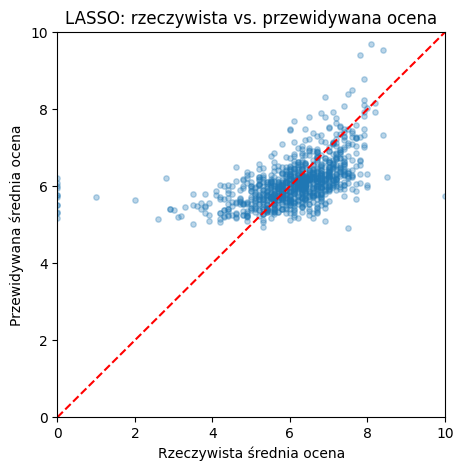

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.3, s=15)
plt.plot([0,10], [0,10], "r--")   # linia idealnej predykcji
plt.xlabel("Rzeczywista średnia ocena")
plt.ylabel("Przewidywana średnia ocena")
plt.title("LASSO: rzeczywista vs. przewidywana ocena")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

## Top 10 cech według wartości współczynników 𝛽𝑗


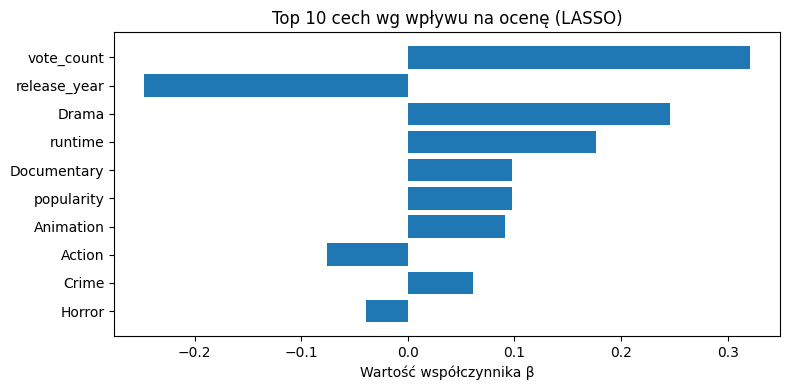

         feature      beta
22    vote_count  0.320653
23  release_year -0.247062
6          Drama  0.245802
20       runtime  0.176466
5    Documentary  0.097766
21    popularity  0.097253
2      Animation  0.091427
0         Action -0.076051
4          Crime  0.060814
11        Horror -0.039477


In [26]:
# 1. Pobranie współczynników i nazwy cech
coefs = lasso.coef_
features = feature_cols  # to ta lista z poprzedniego kroku

# 2. Stworzenie DataFrame z cechami i współczynnikami
coef_df = pd.DataFrame({
    "feature": features,
    "beta": coefs
})
coef_df["abs_beta"] = coef_df["beta"].abs()

# 3. Wybranie top 10 wg |beta|
top10 = coef_df.sort_values("abs_beta", ascending=False).head(10)

# 4. Wykres słupkowy
plt.figure(figsize=(8,4))
plt.barh(top10["feature"], top10["beta"])
plt.xlabel("Wartość współczynnika β")
plt.title("Top 10 cech wg wpływu na ocenę (LASSO)")
plt.gca().invert_yaxis()  # największe na górze
plt.tight_layout()
plt.show()

# 5. Wypisanie ich w konsoli
print(top10[["feature","beta"]])